<a href="https://colab.research.google.com/github/Jerez-lab/ML-course/blob/main/01_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа

## Задание №1

Реализуйте алгоритм K ближайших соседей для классификации.

*    Создайте искуственный набор данных из 100 наблюдений с 3 классами.
*   Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
*   Используйте евклидову меру
*    Если возникает неопределенность (например, все три соседа имею разные метки классов), то присвойте класс случайным образом
*    Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
    Постройте разделающие поверхности классификатора Алгоритм к ближайших соседей:





Для каждого объекта тестового набора данных:

*   вычисление расстояний между всеми объектами тренировочного набора;
*   определение $k$ наименьших расстояний;
*   определение классов для $k$ найденных объектов;
*   присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter

In [ ]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

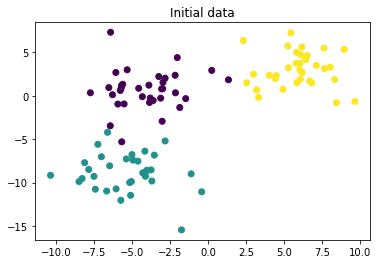

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [ ]:
# Расчёт расстояния между данными испытаний и каждой строкой данных тренировки реализуем с помощью Евклидового метода.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# Используем модуль train_test_split для разделения датасетов.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                   random_state=42)

In [ ]:
def accuracy(pred, real):
    counter = 0;
    for i in range(pred.shape[0]):
        if pred[i] == real[i]:
            counter += 1
    return counter / pred.shape[0]

def kNN(x_train, y_train, x_test, k):
    m = x_train.shape[0]
    distances = []
    for i in range(m):
        dis = euclidean_distance(x_test, x_train[i]) 
        distances.append((dis, y_train[i]))
    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)
    labels = distances[:, 1]
    uniq_label, counts = np.unique(labels, return_counts=True)
    pred = uniq_label[counts.argmax()]
    
    return (pred)

In [ ]:
def draw_class_border(clf, X, Y, k, h=.03, cmap=plt.cm.coolwarm):
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

    Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
    plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
    plt.title(f"k = {k}")
    plt.show()

Accuracy score with 1 neighbors is 0.95


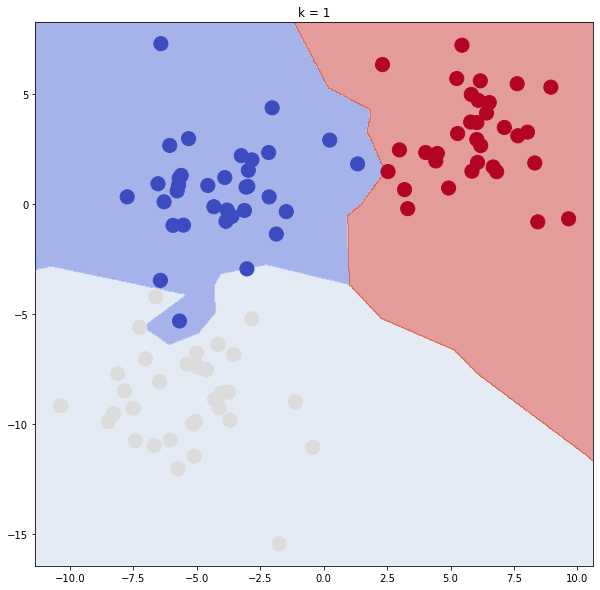

Accuracy score with 3 neighbors is 1.0


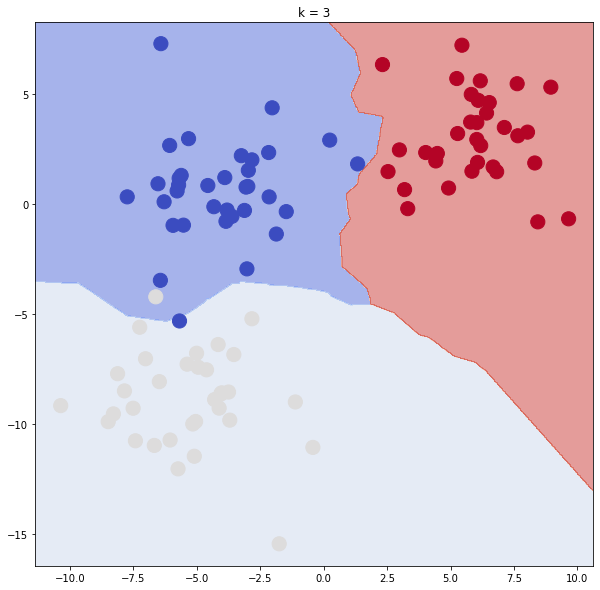

Accuracy score with 5 neighbors is 1.0


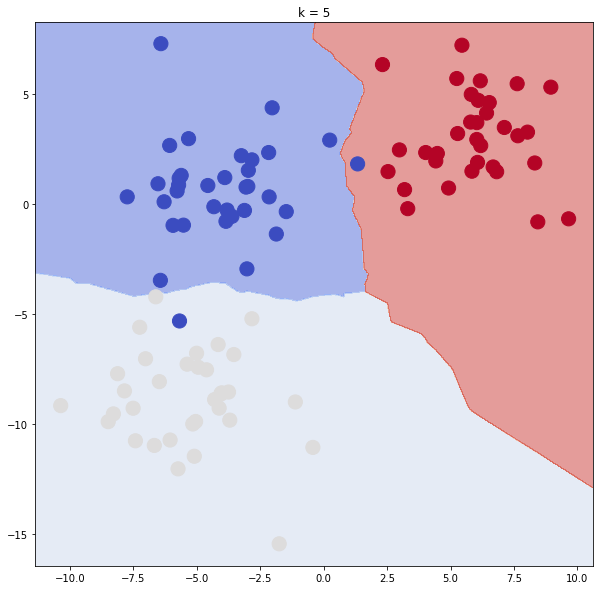

Accuracy score with 7 neighbors is 1.0


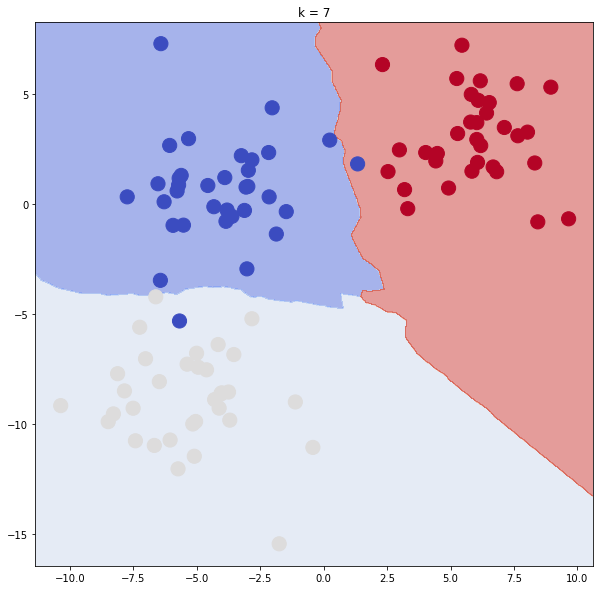

Accuracy score with 9 neighbors is 1.0


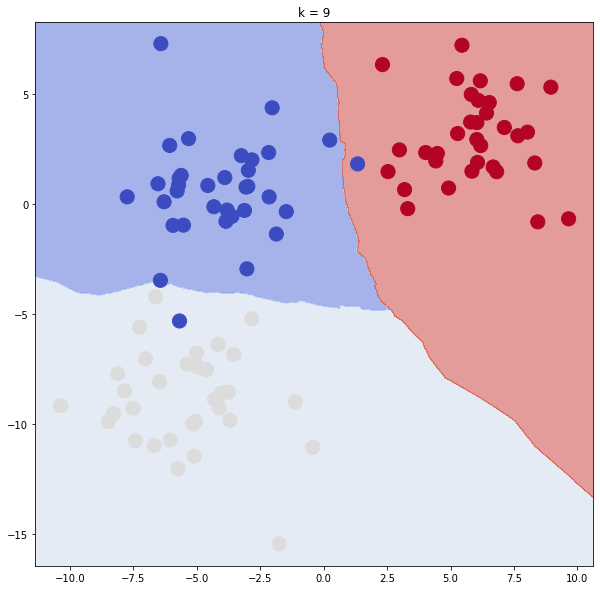

In [ ]:
    for k in range(1, 11, 2):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(f"Accuracy score with {k} neighbors is {accuracy(y_pred, y_test)}")
        draw_class_border(clf, X, Y, k)

## Задание №2


Реализуйте алгоритм K ближайших соседей для регрессии.

* создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренировочную выборку.
* предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.
* постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения $k$. $y = sin(x)$

Алгоритм регрессии:

Для каждого тестового обекта:

1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.



In [ ]:
x = np.arange(0, 5, 0.2)
y = np.sin(x)
len(x)

25

In [ ]:
np.random.seed(4)

In [ ]:
x_train = np.random.choice(x, size=15)
y_train = np.sin(x_train)

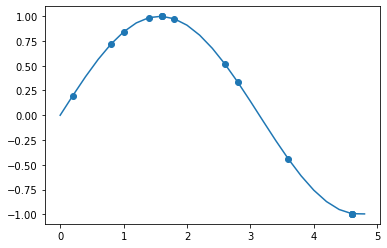

In [ ]:
plt.plot(x, y)
plt.scatter(x_train, y_train);

In [ ]:
def kNN_regressor(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        prediction = np.mean(y_train[distances.argsort()[:k]])
        pred_labels.append(prediction) 
    return pred_labels 

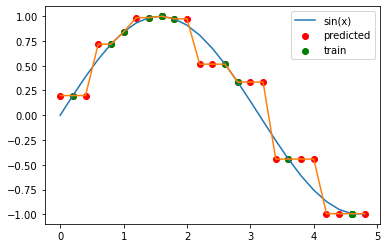

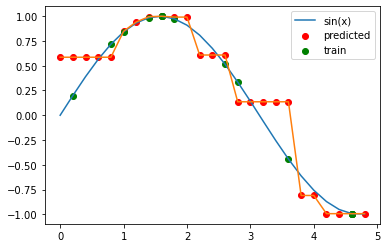

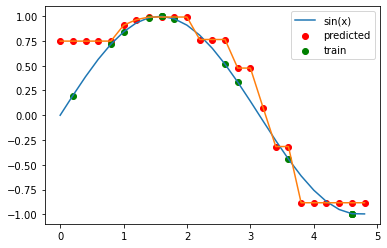

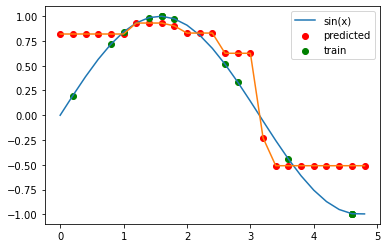

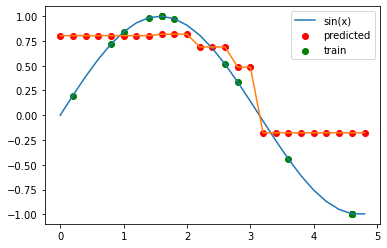

In [ ]:
for k in range(1, 11, 2):
    y_pred = kNN_regressor(x_train, y_train, x, k)
    plt.plot(x, y, label='sin(x)')
    plt.plot(x, y_pred)
    
    plt.scatter(x, y_pred, label='predicted', c='red')
    plt.scatter(x_train, y_train, label='train', c='green')
    
    plt.legend()
    plt.show()